# Multiple Linear Regression

In this notebook we will going to build multiple linear regression model, which will map multiple input features $\bf{x}$ to target variable $y$.

## Outline

- [1 - Packages](#1)

- [2 - Dataset](#2)

- [3 - Multiple Linear Regression Model Using Gradient Descent](#3)
    - [3.1 Custom Model GD](#3point1)
    - [3.2 Sklearn Model GD](#3point2)

- [4 - Multiple Linear Regression Model Using Normal Equation](#4)
    - [4.1 Custom Model NE](#4point1)
    - [4.2 Sklearn Model NE](#4point2)

<a id="1"></a>
## 1 - Packages

Below are the packages/libraries that we are going to use in this notebook.

In [3]:
# Importing necessary packages/libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gd_regression_model import GDRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor, LinearRegression

<a id="2"></a>
## 2 - Dataset

We will going to use multiple linear regression dataset from [Kaggle](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression).

The dataset is downloaded and stored in `multiple_lr_dataset` folder. The folder contains a CSV file named **student_performance.csv**, which we are going to use to train and test our model.

Let's first load the dataset into pandas dataframe, and get the overview of it.

In [4]:
# Loading the dataset into pandas dataframe
data = pd.read_csv("multiple_lr_dataset/student_performance.csv")
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


We have **10,000 rows** and **6 columns** in our dataset, from which we are going to split the dataset into **70%** for training and **30%** for testing.

The first five columns are feature variables $\bf{x}$ that we are going to use to predict our target variable $y$ which is last column. 

While the dataset is clean, we will still going to look for any missing/NaN values in a dataset, and convert the **Extracurricular Activities** column values from 'Yes' and 'No' to 1 and 0.

In [5]:
# Checking for any missing values in a dataset
data.isna().any()

Hours Studied                       False
Previous Scores                     False
Extracurricular Activities          False
Sleep Hours                         False
Sample Question Papers Practiced    False
Performance Index                   False
dtype: bool

There is no missing/NaN values in a dataset.

In [6]:
# Converting the 'Extracurricular Activities' column values to 1 and 0
data["Extracurricular Activities"] = np.where(data["Extracurricular Activities"] == "Yes", 1, 0)
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


We can use the dataset as it is to build our **multiple linear regression model using gradient descent**, but the features values varying in range will slow down the training process significantly. Therefore, feature scaling (_standardizing input features to ensure they have comparable ranges_) must be performed before training the model using gradient descent.

We will going to use StandardScaler (_a method that standardizes features by removing the mean and scaling to unit variance_) from Scikit-Learn's library to scale our features.

First let's convert our dataset into numpy arrays and split it to training and testing sets.

In [7]:
# Converting pandas dataframe into numpy arrays
X = data.to_numpy()[:, 0:5].astype(np.int64)
Y = data.to_numpy()[:, 5:6]

print(f"Shape of X: {X.shape} & Shape of Y: {Y.shape}")

Shape of X: (10000, 5) & Shape of Y: (10000, 1)


In [8]:
# Splitting the dataset into 70% training and 30% testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(f"Shape of X_train: {X_train.shape} & Shape of Y_train: {Y_train.shape}\n"
      f"Shape of X_test: {X_test.shape} & Shape of Y_test: {Y_test.shape}")

Shape of X_train: (7000, 5) & Shape of Y_train: (7000, 1)
Shape of X_test: (3000, 5) & Shape of Y_test: (3000, 1)


In [9]:
# Initializing StandardScaler method and scaling the training dataset features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_train_scaled[:5]

array([[-0.37921729,  1.69543433,  1.01962103, -0.31944271, -1.26226064],
       [ 0.39110222,  1.17637842,  1.01962103,  1.44869036, -0.56482402],
       [ 1.16142173, -0.72682657, -0.98075655, -0.31944271, -1.26226064],
       [ 0.39110222,  1.29172418,  1.01962103,  0.85931267,  0.8300492 ],
       [ 0.39110222, -0.32311642,  1.01962103,  0.85931267, -0.21610572]])

<a id="3"></a>
## 3 - Multiple Linear Regression Model Using Gradient Descent

<a id="3point1"></a>
### 3.1 Custom Model GD

We will first build our own custom multiple linear regression model GD using Numpy, and then we will make use of Scikit-Learn library. And also we will going to use vectorized approach for efficient implementation.

The multiple linear regression model can be represented as:

$$ \hat{Y} = f(X) = X \cdot W + B \tag{1} $$

where,
- $\hat{Y}$ is a prediction matrix.
- $X$ is a input feature matrix.
- $W$ is a weight matrix.
- $B$ is a bias matrix.

The cost function for our model will be Mean Squared Error (MSE):

$$ C = J(W, B) = \frac{\sum(\hat{Y} - Y)^2}{m} \tag{2} $$

where,
- $Y$ is a target variable matrix.
- $m$ is the number of training examples.

And we will train our model using gradient descent:

$$ W = W - \alpha * \frac{\partial J(W, B)}{\partial W} \tag{3} $$
$$ B = B - \alpha * \frac{\partial J(W, B)}{\partial B} \tag{4} $$

where,
$$ \frac{\partial J(W, B)}{\partial W}  = \frac{2}{m} * X^{T} \cdot (\hat{Y} - Y) \tag{5} $$
$$ \frac{\partial J(W, B)}{\partial B}  = \frac{2}{m} * \sum(\hat{Y} - Y) \tag{6} $$

_**NOTE:** All the code implementation of the above is in `gd_regression_model.py` file_.

In [10]:
# Initializing the custom model gd and training it for 1000 iterations
c_model = GDRegression(iterations=1000, alpha=0.1)
c_model.fit(X_train_scaled, Y_train)

Iteration: 1/1000
Cost: 3437.694285714286

Iteration: 2/1000
Cost: 2202.1818413106243

Iteration: 3/1000
Cost: 1411.2691500216952

Iteration: 4/1000
Cost: 904.9624064279728

Iteration: 5/1000
Cost: 580.8447635022527

Iteration: 6/1000
Cost: 373.3555755775832

Iteration: 7/1000
Cost: 240.52680409374966

Iteration: 8/1000
Cost: 155.4927716104719

Iteration: 9/1000
Cost: 101.05537146853044

Iteration: 10/1000
Cost: 66.20511260935248

Iteration: 11/1000
Cost: 43.894128727348104

Iteration: 12/1000
Cost: 29.610598142417828

Iteration: 13/1000
Cost: 20.466168986128785

Iteration: 14/1000
Cost: 14.611776068622218

Iteration: 15/1000
Cost: 10.863673876678243

Iteration: 16/1000
Cost: 8.464038125443016

Iteration: 17/1000
Cost: 6.927711269212436

Iteration: 18/1000
Cost: 5.944093478369691

Iteration: 19/1000
Cost: 5.314335557301136

Iteration: 20/1000
Cost: 4.911130964738876

Iteration: 21/1000
Cost: 4.652975140431675

Iteration: 22/1000
Cost: 4.487686476004665

Iteration: 23/1000
Cost: 4.38185

Text(0, 0.5, 'Cost')

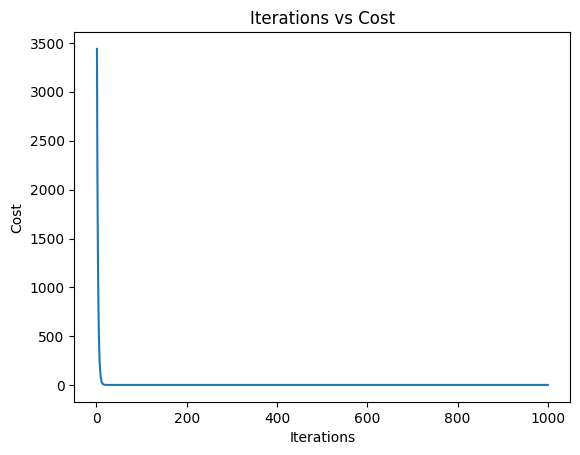

In [11]:
# Plotting the training history of the model
history = np.array(c_model.history)

plt.plot(history[:, 0], history[:, 1])
plt.title("Iterations vs Cost")
plt.xlabel("Iterations")
plt.ylabel("Cost")

As we can see in the above plot that cost has been minimized, thus resulting in optimal parameters for the model. Now we are ready to make prediction.

Since we have standardized our training dataset before training, therefore whenever we will encounter new data we will have to apply same transformation to that data before making predicitions, this insures that the new data follows the same scale as the training data, preventing inconsistencies and ensuring the model makes accurate predictions. To achieve this, we use the same fitted scaler to transform the new data (_e.g. test data_), rather than fitting a new one, as refitting would cause a mismatch in scaling.

In [12]:
# Standardizing the testing dataset
X_test_scaled = scaler.transform(X_test)

X_test_scaled[:5]

array([[ 0.00594246, -0.03475203, -0.98075655,  0.85931267, -0.91354233],
       [-1.1495368 , -1.36122824,  1.01962103, -1.49819809,  1.17876751],
       [ 0.77626198, -0.78449945,  1.01962103,  0.26993498,  0.13261259],
       [ 0.39110222, -1.59191975,  1.01962103,  0.85931267,  0.13261259],
       [ 0.77626198, -0.95751809, -0.98075655, -1.49819809,  0.4813309 ]])

In [13]:
# Making predication on testing dataset and computing the cost
Y_hat_test = c_model.make_prediction(X_test_scaled)

cost = c_model.compute_cost(Y_hat_test, Y_test)
print(f"Cost: {cost}")

Cost: 4.066563824092685


As both training and testing costs are very low, indicating better fit and good generalization to new/unseen data, marks the completion of building a **custom multiple linear regression model using gradient descent**.

<a id="3point2"></a>
### 3.2 Sklearn Model GD

Now we are going to use Scikit-Learn library to build **multiple linear regression model using gradient descent**.

In [14]:
# Initializing and training SGDRegressor model from Scikit-Learn
sgd_reg_model = SGDRegressor(eta0=0.1, penalty=None, random_state=42)
sgd_reg_model.fit(X_train_scaled, Y_train.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [15]:
# Making predication on testing dataset and computing the cost
Y_hat_test_ = sgd_reg_model.predict(X_test_scaled).reshape(-1, 1)

cost_ = c_model.compute_cost(Y_hat_test_, Y_test)
print(f"Cost: {cost_}")

Cost: 4.065393246976898


The test cost of the scikit-learn model is pretty much same as the custom model, resulting in same remarks as custom model. And the goal of building a **Multiple Linear Regression Model Using Gradient Descent** is completed.

<a id="4"></a>
## 4 - Multiple Linear Regression Model Using Normal Equation

<a id="4point1"></a>
### 4.1 Custom Model NE

Just like previous one we will first build our own custom multiple linear regression model NE using Numpy, and then we will make use of Scikit-Learn library.

We only have to implement the below equation in code to find the optimal parameters for our model:

$$ W = (X^T \cdot X)^{-1} \cdot X^T \cdot Y \tag{1} $$

where,
- $W$ is a model parameters matrix.
- $X$ is a input feature matrix.
- $Y$ is a target variable matrix.

_**NOTE:** Solving regression problem using normal equation requires the bias term to be included in weight matrix. Therefore we also have to add 1's column vector to our original feature datasets, so the dimensions should be matched during matrix multiplication. And also feature scaling is not required because it does not use gradient descent to find the optimal parameters for the model._

In [16]:
# Adding 1's column vector to feature datasets
X_train_ = np.hstack((X_train, np.ones((X_train.__len__(), 1)))).astype(np.int64)
X_test_ = np.hstack((X_test, np.ones((X_test.__len__(), 1)))).astype(np.int64)

print(f"Shape of X_train_: {X_train_.shape} & Shape of X_test_: {X_test_.shape}")

Shape of X_train_: (7000, 6) & Shape of X_test_: (3000, 6)


In [17]:
# Finding the optimal parameters using normal equation method
W = np.linalg.inv(X_train_.T @ X_train_) @ (X_train_.T @ Y_train)
print(f"Optimal parameters:\n {W}")

Optimal parameters:
 [[  2.85895223]
 [  1.01551979]
 [  0.58171285]
 [  0.47967676]
 [  0.19039416]
 [-33.83654381]]


In [18]:
# Making predication on testing dataset and computing the cost
print(f"Cost: {c_model.compute_cost((X_test_ @ W), Y_test)}")

Cost: 4.066563824092882


The results match with the gradient descent trained model, but with much less implementation.

<a id="4point2"></a>
### 4.2 Sklearn Model NE

Now we are going to use Scikit-Learn library to build **multiple linear regression model using normal equation**.

In [19]:
# Initializing and training LinearRegression model from Scikit-Learn
linear_reg_model = LinearRegression(fit_intercept=False)
linear_reg_model.fit(X_train_, Y_train)

LinearRegression(fit_intercept=False)

In [20]:
# Making predication on testing data and computing the cost
print(f"Cost: {c_model.compute_cost(linear_reg_model.predict(X_test_), Y_test)}")

Cost: 4.066563824092631


Both the Custom model and Scikit-Learn model has achieved identical results, marking the completion of **Multiple Linear Regression Model Using Normal Equation**.